# Tutorial for Volumetric Interpolation Code
This tutorial will show how to use the volumetricinterp package to evalutate the electron density anywhere in an AMISR FoV.

## Estimate Values
Use the Estimate class to estimate values based on an interpolated coefficient file.  First create an Estimate instance by passing the name of the coefficient file.

In [3]:
from volumetricinterp import Estimate

params = Estimate('20161127.002_lp_1min-fitcal_volint.h5')

Define a set of points to evaluate the density at.  The location arrays (glat, glon, galt) must be equal in shape.

In [13]:
import numpy as np
import datetime as dt

time = dt.datetime(2016,11,27,23,56)
galt = np.arange(200., 500., 10.)
glat = np.full(galt.shape, 77.)
glon = np.full(galt.shape, -90.)


Call the Estimate class to get the interpolated electron density.

In [14]:
density = params(time, glat, glon, galt)

Plot the output density

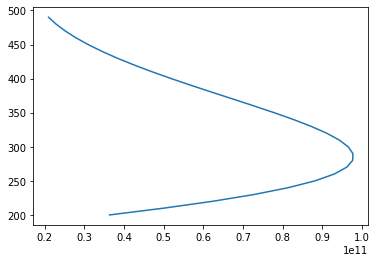

In [12]:
import matplotlib.pyplot as plt

plt.plot(density, galt)